In [1]:
import re
import math
import numpy as np
import nltk
import string
from sklearn import metrics
from collections import defaultdict, Counter
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import auc, confusion_matrix, recall_score, roc_curve, precision_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction import text
from sklearn.cluster import KMeans

# Problem 1

In [2]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
data_all = fetch_20newsgroups(subset = 'all', categories = categories, shuffle = True, random_state = 42)


stop_words = text.ENGLISH_STOP_WORDS

vect_all = CountVectorizer(analyzer = 'word', stop_words = stop_words, min_df = 3)
counts_all = vect_all.fit_transform(data_all.data)
TFxIDF_transformer = TfidfTransformer()
TFxIDF_all = TFxIDF_transformer.fit_transform(counts_all)

print("The dimension of TF-IDF Vector with min_df=3 is",TFxIDF_all.shape)
print('The number of Terms Extracted with min_df=3 is',TFxIDF_all.shape[1])

The dimension of TF-IDF Vector with min_df=3 is (7882, 27768)
The number of Terms Extracted with min_df=3 is 27768


# Problem 2

In [3]:
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)
km_all.fit(TFxIDF_all)

new_target = (data_all.target[:]<4)*1
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)


Homogeneity: 0.253
Completeness: 0.335
V-measure: 0.288
Adjusted Rand-Index: 0.181
Adjusted Mutual-Index: 0.253
The contingency matrix:
 [[1717 2262]
 [   4 3899]] 




# Problem 3 (1)

In [4]:
# LSI dimension reduction at min_df=3
from sklearn.decomposition import TruncatedSVD

variance_ratio_LSI = list()
LSI = TruncatedSVD(n_components = 1000, random_state = 42)
TFxIDF_all_LSI = LSI.fit_transform(TFxIDF_all)
ratio_LSI = LSI.explained_variance_ratio_

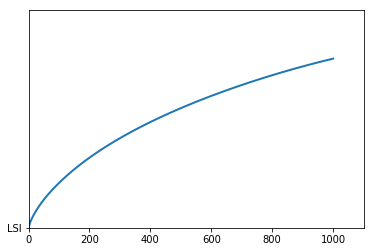

In [6]:
import matplotlib.pyplot as plt

x = np.arange(1, 1001, 1)
y_LSI = [(sum(ratio_LSI[:t])) for t in range(1,1001)]

plt.figure()
plt.xlim(1, 1100)
plt.ylim(0, 0.72)
plt.plot(x, y_LSI, '-', 'LSI', linewidth=2)
plt.show()

# Problem 3 (2)

In [6]:
gamma_choices = [1, 2, 3, 5, 10, 20, 50, 100, 300]
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)
new_target = (data_all.target[:]>=4)*1

LSI_Homogeneity = list()
LSI_Completeness = list()
LSI_V_measure = list()
LSI_Adjusted_rand = list()
LSI_Adjusted_mutual_info = list()

# Do dimension reduction with LSI at min_df=3
print('@'*20,'Do dimension reduction with LSI at min_df=3','@'*20,'\n')
for gamma in gamma_choices:
    LSI = TruncatedSVD(n_components = gamma, random_state = 42)
    TFxIDF_all_LSI = LSI.fit_transform(TFxIDF_all)
    km_all.fit(TFxIDF_all_LSI)
    print('~'*10, '5 measure scores when γ is', gamma, '~'*10)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
    LSI_Homogeneity.append(metrics.homogeneity_score(new_target, km_all.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
    LSI_Completeness.append(metrics.completeness_score(new_target, km_all.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
    LSI_V_measure.append(metrics.v_measure_score(new_target, km_all.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
    LSI_Adjusted_rand.append(metrics.adjusted_rand_score(new_target, km_all.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
    LSI_Adjusted_mutual_info.append(metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
    print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)

@@@@@@@@@@@@@@@@@@@@ Do dimension reduction with LSI at min_df=3 @@@@@@@@@@@@@@@@@@@@ 

~~~~~~~~~~ 5 measure scores when γ is 1 ~~~~~~~~~~
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: 0.000
Adjusted Mutual-Index: 0.000
The contingency matrix:
 [[2200 1703]
 [2323 1656]] 


~~~~~~~~~~ 5 measure scores when γ is 2 ~~~~~~~~~~
Homogeneity: 0.598
Completeness: 0.599
V-measure: 0.599
Adjusted Rand-Index: 0.702
Adjusted Mutual-Index: 0.598
The contingency matrix:
 [[3684  219]
 [ 421 3558]] 


~~~~~~~~~~ 5 measure scores when γ is 3 ~~~~~~~~~~
Homogeneity: 0.390
Completeness: 0.432
V-measure: 0.410
Adjusted Rand-Index: 0.377
Adjusted Mutual-Index: 0.390
The contingency matrix:
 [[3874   29]
 [1492 2487]] 


~~~~~~~~~~ 5 measure scores when γ is 5 ~~~~~~~~~~
Homogeneity: 0.221
Completeness: 0.310
V-measure: 0.258
Adjusted Rand-Index: 0.145
Adjusted Mutual-Index: 0.221
The contingency matrix:
 [[3898    5]
 [2437 1542]] 


~~~~~~~~~~ 5 measure scores when γ is 10

In [7]:
# Do dimension reduction with NMF at min_df=3
from sklearn.decomposition import NMF

NMF_Homogeneity = list()
NMF_Completeness = list()
NMF_V_measure = list()
NMF_Adjusted_rand = list()
NMF_Adjusted_mutual_info = list()

print('@'*20,'Do dimension reduction with NMF at min_df=3','@'*20)
for gamma in gamma_choices:
    nmf = NMF(n_components = gamma, init = 'random', random_state = 0)
    TFxIDF_all_NMF = nmf.fit_transform(TFxIDF_all)
    km_all.fit(TFxIDF_all_NMF)
    print('~'*20, '5 measure scores when γ is', gamma, '~'*20)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
    NMF_Homogeneity.append(metrics.homogeneity_score(new_target, km_all.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
    NMF_Completeness.append(metrics.completeness_score(new_target, km_all.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
    NMF_V_measure.append(metrics.v_measure_score(new_target, km_all.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
    NMF_Adjusted_rand.append(metrics.adjusted_rand_score(new_target, km_all.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
    NMF_Adjusted_mutual_info.append(metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
    print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)

@@@@@@@@@@@@@@@@@@@@ Do dimension reduction with NMF at min_df=3 @@@@@@@@@@@@@@@@@@@@
~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 1 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: 0.000
Adjusted Mutual-Index: 0.000
The contingency matrix:
 [[2200 1703]
 [2323 1656]] 


~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 2 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.593
Completeness: 0.608
V-measure: 0.600
Adjusted Rand-Index: 0.649
Adjusted Mutual-Index: 0.593
The contingency matrix:
 [[ 731 3172]
 [3943   36]] 


~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 3 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.238
Completeness: 0.317
V-measure: 0.272
Adjusted Rand-Index: 0.170
Adjusted Mutual-Index: 0.237
The contingency matrix:
 [[  13 3890]
 [1674 2305]] 


~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 5 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.126
Completeness: 0.128
V-measure: 0.127
Adjusted Rand-Index: 0.165
Adjusted Mutual-Index: 0.126
The contingency m

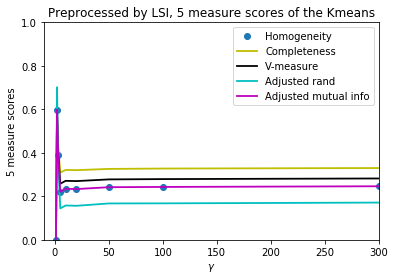

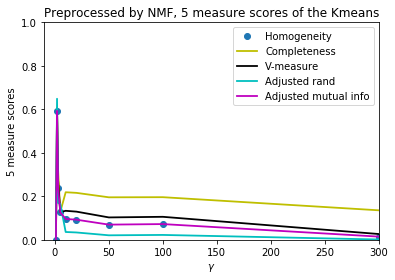

In [8]:
gamma_choices = [1, 2, 3, 5, 10, 20, 50, 100, 300]

plt.figure(1)
plt.xlim(-10, 300)
plt.ylim(0, 1)
plt.title('Preprocessed by LSI, 5 measure scores of the Kmeans')
plt.xlabel(r'$\gamma$')
plt.ylabel('5 measure scores')
plt.plot(gamma_choices, LSI_Homogeneity, 'o', gamma_choices, LSI_Completeness, 'y', gamma_choices, LSI_V_measure, 'k', 
         gamma_choices, LSI_Adjusted_rand, 'c', gamma_choices, LSI_Adjusted_mutual_info,'m', linewidth=1.8)
plt.legend(('Homogeneity', 'Completeness', 'V-measure', 'Adjusted rand', 'Adjusted mutual info'), loc='upper right')
plt.show()


plt.figure(2)
plt.xlim(-10, 300)
plt.ylim(0, 1)
plt.title('Preprocessed by NMF, 5 measure scores of the Kmeans')
plt.xlabel(r'$\gamma$')
plt.ylabel('5 measure scores')
plt.plot(gamma_choices, NMF_Homogeneity, 'o', gamma_choices, NMF_Completeness, 'y', gamma_choices, NMF_V_measure, 'k', 
         gamma_choices, NMF_Adjusted_rand, 'c', gamma_choices, NMF_Adjusted_mutual_info, 'm', linewidth=1.8)
plt.legend(('Homogeneity', 'Completeness', 'V-measure', 'Adjusted rand', 'Adjusted mutual info'), loc='upper right')
plt.show()


# Problem 4(a)

In [9]:
def draw_plot2 (data, kmeans):
    for i in range(data.shape[0]):
        if (new_target[i] == 0):
            color = 'k'
        else:
            color = 'r'
        plt.scatter(data[i, 0], data[i, 1], color=color)

    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='w', linewidth=2)
    plt.show()
    
def draw_decision(data,kmeans,scaling_factor):
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - scaling_factor, data[:, 0].max() + scaling_factor
    y_min, y_max = data[:, 1].min() - scaling_factor, data[:, 1].max() + scaling_factor
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(data[:, 0], data[:, 1], 'k.', markersize=1)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

The visualization of the LSI
Number of components: 2


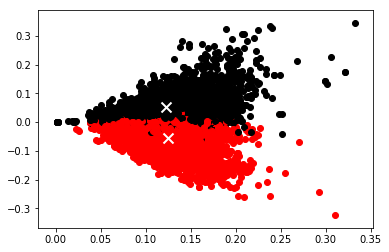

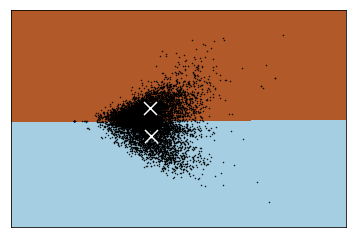

In [10]:
#best values for SVD n_components = 2
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)
LSI = TruncatedSVD(n_components = 2, random_state = 42)
TFxIDF_all_LSI = LSI.fit_transform(TFxIDF_all)
km_all.fit(TFxIDF_all_LSI)
print('The visualization of the LSI')
print("Number of components: 2")
draw_plot2 (TFxIDF_all_LSI,km_all)
draw_decision(TFxIDF_all_LSI,km_all,0.1)

The visualization of the NMF
Number of components: 2


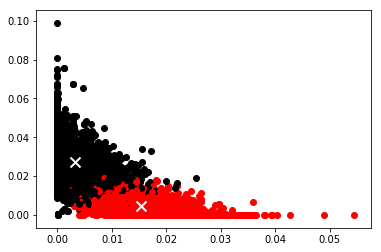

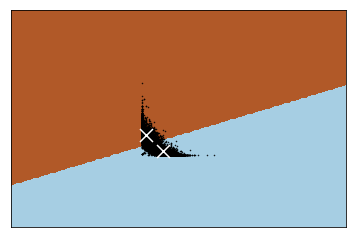

In [11]:
#best values for NMF n_components = 2
from sklearn.decomposition import NMF

NMF = NMF(n_components = 2, init = 'random', random_state = 0)
TFxIDF_all_NMF = NMF.fit_transform(TFxIDF_all)
km_all.fit(TFxIDF_all_NMF)
print('The visualization of the NMF')
print("Number of components: 2")
draw_plot2 (TFxIDF_all_NMF,km_all)
draw_decision(TFxIDF_all_NMF,km_all,0.1)

# Problem 4(b)

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

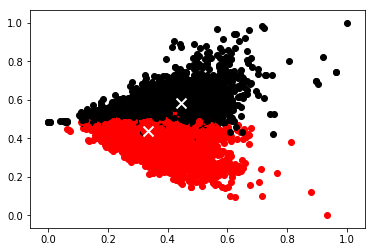

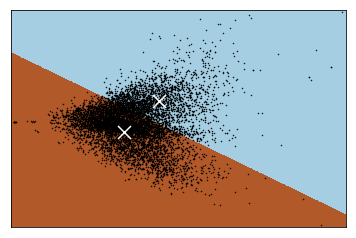

Homogeneity: 0.256
Completeness: 0.286
V-measure: 0.270
Adjusted Rand-Index: 0.274
Adjusted Mutual-Index: 0.255
The contingency matrix:
 [[2236 1667]
 [ 210 3769]] 




In [13]:
# Do the scaling after LSI

LSI = TruncatedSVD(n_components = 2, random_state = 42)
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)

TFxIDF_all_LSI = LSI.fit_transform(TFxIDF_all)
scale = MinMaxScaler()
TFxIDF_all_LSI_scaled = scale.fit_transform(TFxIDF_all_LSI)
km_all.fit(TFxIDF_all_LSI_scaled)

draw_plot2(TFxIDF_all_LSI_scaled, km_all)
draw_decision(TFxIDF_all_LSI_scaled, km_all, 0.01)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)

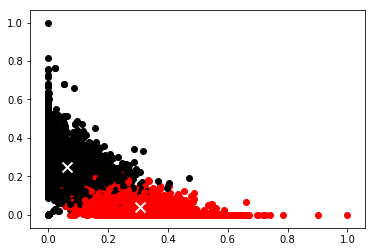

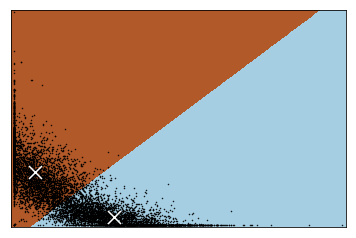

Homogeneity: 0.677
Completeness: 0.678
V-measure: 0.678
Adjusted Rand-Index: 0.774
Adjusted Mutual-Index: 0.677
The contingency matrix:
 [[ 326 3577]
 [3831  148]] 




In [14]:
# Do the scaling after NMF

NMF = NMF(n_components = 2, init = 'random', random_state = 0)
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)

TFxIDF_all_NMF = NMF.fit_transform(TFxIDF_all)
scale = MinMaxScaler()
TFxIDF_all_NMF_scaled = scale.fit_transform(TFxIDF_all_NMF)
km_all.fit(TFxIDF_all_NMF_scaled)

draw_plot2(TFxIDF_all_NMF_scaled, km_all)
draw_decision(TFxIDF_all_NMF_scaled, km_all, 0.01)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)

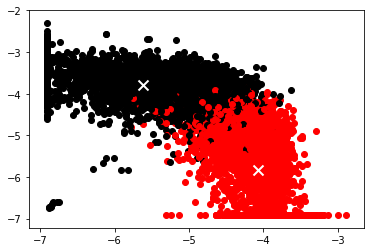

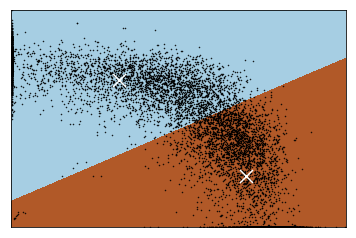

Homogeneity: 0.706
Completeness: 0.707
V-measure: 0.707
Adjusted Rand-Index: 0.801
Adjusted Mutual-Index: 0.706
The contingency matrix:
 [[3761  142]
 [ 272 3707]] 




In [15]:
from sklearn.decomposition import NMF

# Do the non-linear transformation only
NMF = NMF(n_components = 2, init = 'random', random_state = 0)
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)

TFxIDF_all_NMF = NMF.fit_transform(TFxIDF_all)
log_NMF = np.log(0.001 + TFxIDF_all_NMF)
km_all.fit(log_NMF)

draw_plot2(log_NMF, km_all)
draw_decision(log_NMF, km_all, 0.01)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)

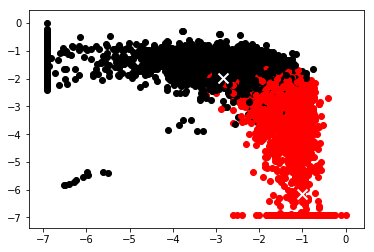

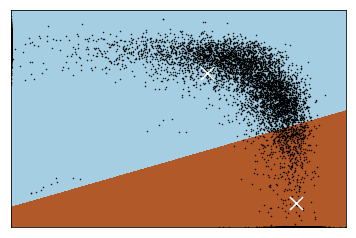

Do scaling before the non-linear transformation
Homogeneity: 0.275
Completeness: 0.354
V-measure: 0.310
Adjusted Rand-Index: 0.201
Adjusted Mutual-Index: 0.275
The contingency matrix:
 [[3903    0]
 [2172 1807]] 




In [16]:
from sklearn.decomposition import NMF

NMF = NMF(n_components = 2, init = 'random', random_state = 0)
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)
scale = MinMaxScaler()

# Do scaling before the non-linear transformation
TFxIDF_all_NMF = NMF.fit_transform(TFxIDF_all)
scaled_NMF = scale.fit_transform(TFxIDF_all_NMF)
scaled_log_NMF = np.log(0.001 + scaled_NMF)

km_all.fit(scaled_log_NMF)

draw_plot2(scaled_log_NMF, km_all)
draw_decision(scaled_log_NMF, km_all, 0.01)
print('Do scaling before the non-linear transformation')
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)




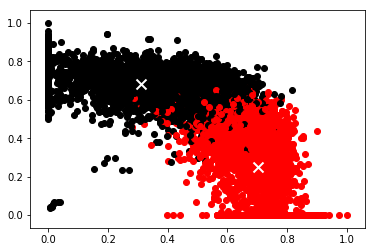

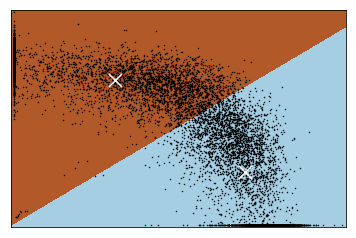

Do the non-linear transformation before scaling
Homogeneity: 0.709
Completeness: 0.709
V-measure: 0.709
Adjusted Rand-Index: 0.806
Adjusted Mutual-Index: 0.709
The contingency matrix:
 [[ 210 3693]
 [3787  192]] 




In [17]:
from sklearn.decomposition import NMF

# Do the non-linear transformation before scaling 
NMF = NMF(n_components = 2, init = 'random', random_state = 0)
km_all = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)
scale = MinMaxScaler()

TFxIDF_all_NMF = NMF.fit_transform(TFxIDF_all)
log_NMF = np.log(0.001 + TFxIDF_all_NMF)
log_scaled_NMF = scale.fit_transform(log_NMF)
km_all.fit(log_scaled_NMF)

draw_plot2(log_scaled_NMF, km_all)
draw_decision(log_scaled_NMF, km_all, 0.01)
print('Do the non-linear transformation before scaling')
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km_all.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km_all.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km_all.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km_all.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km_all.labels_))
print('The contingency matrix:\n',confusion_matrix(new_target, km_all.labels_),'\n'*2)

# Problem 5

In [18]:
data_20 = fetch_20newsgroups(subset = 'all', shuffle = True, random_state = 42)

stop_words = text.ENGLISH_STOP_WORDS

vect_20 = CountVectorizer(analyzer = 'word', stop_words = stop_words, min_df = 3)
counts_20 = vect_20.fit_transform(data_20.data)
TFxIDF_transformer = TfidfTransformer()
TFxIDF_20 = TFxIDF_transformer.fit_transform(counts_20)

print("The dimension of TF-IDF Vector with min_df=3 is",TFxIDF_20.shape)
print('The number of Terms Extracted with min_df=3 is',TFxIDF_20.shape[1])

km_20 = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10, algorithm='auto', verbose=0)
km_20.fit(TFxIDF_20)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

The dimension of TF-IDF Vector with min_df=3 is (18846, 52295)
The number of Terms Extracted with min_df=3 is 52295
Homogeneity: 0.309
Completeness: 0.363
V-measure: 0.334
Adjusted Rand-Index: 0.125
Adjusted Mutual-Index: 0.307
The contingency matrix:
 [[ 38 144  13   2  95   0   0 156   1  14  70  27   0   0   0  88   5 144
    2   0]
 [  0 186   0   1  96  81   1   1   0   2  81  18   1   0   1 383  17   2
    9  93]
 [  0 111   0   0  64 498   5   0   0   6  31  12  11   0   1 128  11   1
   10  96]
 [  0 109   0   0 113  48   2   0   0   6  26   6 186   2   2 172  31   0
   28 251]
 [  0 221   0   0  72   8   1   0   0  18  21  22  72   0   0 202  15   1
   27 283]
 [  0 121   0   0 145 167   1   0   3  21  88   1   0   0   0 417   3   0
    6  15]
 [  0 381   0   3 131  21   5   0   0  15   5   5  42  12  39 182   7   1
   42  84]
 [  0 135   0   3 161   2   0   0   0  18  18  41   0   0 483  76  12   3
   38   0]
 [  0 128   0   0 206   0   1   0   0  12 100   9   0   0 442  71  

In [23]:
gamma_choices = [1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 15, 20, 50, 100]

LSI_Homogeneity = list()
LSI_Completeness = list()
LSI_V_measure = list()
LSI_Adjusted_rand = list()
LSI_Adjusted_mutual_info = list()

# Do dimension reduction with LSI at min_df=3 and try to find the best gamma
print('@'*20,'Do dimension reduction with LSI at min_df=3','@'*20,'\n')
for gamma in gamma_choices:
    LSI = TruncatedSVD(n_components = gamma, random_state = 42)
    TFxIDF_20_LSI = LSI.fit_transform(TFxIDF_20)
    km_20.fit(TFxIDF_20_LSI)
    print('~'*10, '5 measure scores when γ is', gamma, '~'*10)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
    LSI_Homogeneity.append(metrics.homogeneity_score(data_20.target, km_20.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
    LSI_Completeness.append(metrics.completeness_score(data_20.target, km_20.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
    LSI_V_measure.append(metrics.v_measure_score(data_20.target, km_20.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
    LSI_Adjusted_rand.append(metrics.adjusted_rand_score(data_20.target, km_20.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
    LSI_Adjusted_mutual_info.append(metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
#     print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

@@@@@@@@@@@@@@@@@@@@ Do dimension reduction with LSI at min_df=3 @@@@@@@@@@@@@@@@@@@@ 

~~~~~~~~~~ 5 measure scores when γ is 1 ~~~~~~~~~~
Homogeneity: 0.028
Completeness: 0.031
V-measure: 0.029
Adjusted Rand-Index: 0.006
Adjusted Mutual-Index: 0.025
~~~~~~~~~~ 5 measure scores when γ is 2 ~~~~~~~~~~
Homogeneity: 0.210
Completeness: 0.224
V-measure: 0.217
Adjusted Rand-Index: 0.065
Adjusted Mutual-Index: 0.208
~~~~~~~~~~ 5 measure scores when γ is 3 ~~~~~~~~~~
Homogeneity: 0.233
Completeness: 0.242
V-measure: 0.237
Adjusted Rand-Index: 0.080
Adjusted Mutual-Index: 0.230
~~~~~~~~~~ 5 measure scores when γ is 5 ~~~~~~~~~~
Homogeneity: 0.309
Completeness: 0.325
V-measure: 0.317
Adjusted Rand-Index: 0.122
Adjusted Mutual-Index: 0.306
~~~~~~~~~~ 5 measure scores when γ is 8 ~~~~~~~~~~
Homogeneity: 0.340
Completeness: 0.377
V-measure: 0.357
Adjusted Rand-Index: 0.138
Adjusted Mutual-Index: 0.338
~~~~~~~~~~ 5 measure scores when γ is 9 ~~~~~~~~~~
Homogeneity: 0.328
Completeness: 0.361
V-measu

In [24]:
# Do dimension reduction with NMF at min_df=3 and try to find the best gamma
from sklearn.decomposition import NMF

NMF_Homogeneity = list()
NMF_Completeness = list()
NMF_V_measure = list()
NMF_Adjusted_rand = list()
NMF_Adjusted_mutual_info = list()

print('@'*20,'Do dimension reduction with NMF at min_df=3','@'*20)
for gamma in gamma_choices:
    nmf = NMF(n_components = gamma, init = 'random', random_state = 0)
    TFxIDF_20_NMF = nmf.fit_transform(TFxIDF_20)
    km_20.fit(TFxIDF_20_NMF)
    print('~'*20, '5 measure scores when γ is', gamma, '~'*20)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
    NMF_Homogeneity.append(metrics.homogeneity_score(data_20.target, km_20.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
    NMF_Completeness.append(metrics.completeness_score(data_20.target, km_20.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
    NMF_V_measure.append(metrics.v_measure_score(data_20.target, km_20.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
    NMF_Adjusted_rand.append(metrics.adjusted_rand_score(data_20.target, km_20.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
    NMF_Adjusted_mutual_info.append(metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
#     print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

@@@@@@@@@@@@@@@@@@@@ Do dimension reduction with NMF at min_df=3 @@@@@@@@@@@@@@@@@@@@
~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 1 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.028
Completeness: 0.031
V-measure: 0.029
Adjusted Rand-Index: 0.006
Adjusted Mutual-Index: 0.025
~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 2 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.165
Completeness: 0.177
V-measure: 0.171
Adjusted Rand-Index: 0.048
Adjusted Mutual-Index: 0.163
~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 3 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.202
Completeness: 0.209
V-measure: 0.206
Adjusted Rand-Index: 0.065
Adjusted Mutual-Index: 0.200
~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 5 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.279
Completeness: 0.294
V-measure: 0.286
Adjusted Rand-Index: 0.104
Adjusted Mutual-Index: 0.276
~~~~~~~~~~~~~~~~~~~~ 5 measure scores when γ is 8 ~~~~~~~~~~~~~~~~~~~~
Homogeneity: 0.292
Completeness: 0.325
V-measure: 0.308
Adjusted Rand-Index: 0.112
Adjusted Mutual-Index: 0.290

In [29]:
# Do the scaling after LSI with best gamma
best_gamma_lsi = 10
LSI = TruncatedSVD(n_components = best_gamma_lsi, random_state = 42)
TFxIDF_20_LSI = LSI.fit_transform(TFxIDF_20)
scaled_LSI_20 = scale.fit_transform(TFxIDF_20_LSI)
km_20.fit(scaled_LSI_20)

print('~'*10, 'Do the scaling after LSI, 5 measure scores when γ is', best_gamma_lsi, '~'*10)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)


# Do the scaling after NMF with best gamma
best_gamma_nmf = 10
nmf = NMF(n_components = best_gamma_nmf, init = 'random', random_state = 0)
TFxIDF_20_NMF = nmf.fit_transform(TFxIDF_20)
scaled_NMF_20 = scale.fit_transform(TFxIDF_20_NMF)
km_20.fit(scaled_NMF_20)

print('~'*10, 'Do the scaling after NMF, 5 measure scores when γ is', best_gamma_nmf, '~'*10)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

~~~~~~~~~~ Do the scaling after LSI, 5 measure scores when γ is 10 ~~~~~~~~~~
Homogeneity: 0.299
Completeness: 0.329
V-measure: 0.314
Adjusted Rand-Index: 0.128
Adjusted Mutual-Index: 0.297
The contingency matrix:
 [[242  31  39  58   0   1   2 126   2   0   0 100   0   0  54   0  30  12
   91  11]
 [  1 184  69 146   0   0  56   2  12   0   0  29  25   0   0   7   3 369
   61   9]
 [  0  84  53  85   0   0 294   0   7   0   2   8  43   0   0   1   2 367
   31   8]
 [  0 118 104  91   3   0  40   1  11   0 105  19 299   0   0   0   0 127
   37  27]
 [  0 143  77 205   1   0  10   0   8   0  21  27 261   0   0   5   3  73
   96  33]
 [  0 194  85  83   0   0  82   1  19   0   0   9   1   0   0  11   0 455
   44   4]
 [  1 209  93 310  12   0   9   1  10   0  18  23 124   0   0   1   0  37
   83  44]
 [  0 137 275 173   0   0   0   5  22   0   0 202   4   0   0   2  32   9
   90  39]
 [  9 137 390 129   4   0   0  31  23   0   0 147   0   0   0   1   8  24
   79  14]
 [  0 110 118 179 36

In [26]:
# Do the non-linear transformation only
nmf = NMF(n_components = best_gamma_nmf, init = 'random', random_state = 0)
TFxIDF_20_NMF = nmf.fit_transform(TFxIDF_20)
NMF_log_20 = np.log(0.001+TFxIDF_20_NMF)
km_20.fit(NMF_log_20)

print('~'*10, 'Do the non-linear transformation only, 5 measure scores when γ is', best_gamma_nmf, '~'*10)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

~~~~~~~~~~ Do the non-linear transformation only, 5 measure scores when γ is 10 ~~~~~~~~~~
Homogeneity: 0.366
Completeness: 0.371
V-measure: 0.368
Adjusted Rand-Index: 0.200
Adjusted Mutual-Index: 0.364
The contingency matrix:
 [[  0   0  93  99  46   2 179   3   8 251   5   4  44  51   0   2   0   0
   11   1]
 [ 30   7  11   8  85   4   1 113  43   0  26 144  65   0 339   9  21   7
    0  60]
 [ 45   4   6   5  25   3   0  61  20   1  14 206  19   1 468   7  38   5
    0  57]
 [258   2  12   0  30   5   0  41  26   0  14  53  12   0  65   7 287   3
    0 167]
 [157   5   8   3  82  11   0  37  23   0  14  20  22   0  35   9 278   2
    1 256]
 [ 17   3   9   3  48  15   1 125  22   1  34 314  19   1 341  10   2  10
    0  13]
 [ 98  31  17   1 182   4   1   7  34   0  12  37  37   0  26  44 238   5
    1 200]
 [ 27   6 259  16  99   5   1  19 196   2  25  68  99  33   5  54   6   8
    7  55]
 [ 32   6 202  63  58   1  12  51 170   1  25  49  66  54   0 164  16   5
    3  18]
 [  1 4

In [27]:
# Do the scaling after non-linear transformation
nmf = NMF(n_components = best_gamma_nmf, init = 'random', random_state = 0)
TFxIDF_20_NMF = nmf.fit_transform(TFxIDF_20)
NMF_log_20 = np.log(0.001+TFxIDF_20_NMF)
log_scaled_20 = scale.fit_transform(NMF_log_20)
km_20.fit(log_scaled_20)

print('~'*10, 'Do the scaling after non-linear transformation, 5 measure scores when γ is', best_gamma_nmf, '~'*10)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

~~~~~~~~~~ Do the scaling after non-linear transformation, 5 measure scores when γ is 10 ~~~~~~~~~~
Homogeneity: 0.349
Completeness: 0.355
V-measure: 0.352
Adjusted Rand-Index: 0.170
Adjusted Mutual-Index: 0.347
The contingency matrix:
 [[ 80   4  54   0  56   6   1   0 137   3   2 191  10  34  42   4   0 173
    0   2]
 [  2 277   1   4 104 143   1 177   0   0   9   1  32  15  23  20 142   2
   14   6]
 [  0 292   2   1  53  59   1 293   0   0   3   0  22   4  14  10 196   0
   34   1]
 [  1 108   1   7  42  86   4  69   0   0   4   0  38   8  30  14 244   1
  321   4]
 [ 19 128   1   3  35 156   4  44   0   0  11   0  37  13  28  12 120   0
  350   2]
 [  3 235   0   6 109  50   7 206   1   0   3   2  26   2  28  30 270   0
    0  10]
 [ 21 150   1  23   7 110   4  13   2   0  63   1  36  21 109  12  91   0
  306   5]
 [ 64  41  57   7  29  49   2   2   1   0  20   1 160 306 164  21  42   4
   15   5]
 [ 24  18  55  28 118  26   0   0   3   0  27   1 186 210 197  24  37  13
   21   8

In [28]:
# Do non-linear transformation after the scaling
nmf = NMF(n_components = best_gamma_nmf, init = 'random', random_state = 0)
TFxIDF_20_NMF = nmf.fit_transform(TFxIDF_20)
scaled_20 = scale.fit_transform(TFxIDF_20_NMF)
scaled_log_20 = np.log(0.001+scaled_20)
km_20.fit(scaled_log_20)

print('~'*10, 'Do non-linear transformation after the scaling, 5 measure scores when γ is', best_gamma_nmf, '~'*10)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(data_20.target, km_20.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(data_20.target, km_20.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(data_20.target, km_20.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(data_20.target, km_20.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(data_20.target, km_20.labels_))
print('The contingency matrix:\n',confusion_matrix(data_20.target, km_20.labels_),'\n'*2)

~~~~~~~~~~ Do non-linear transformation after the scaling, 5 measure scores when γ is 10 ~~~~~~~~~~
Homogeneity: 0.289
Completeness: 0.293
V-measure: 0.291
Adjusted Rand-Index: 0.132
Adjusted Mutual-Index: 0.287
The contingency matrix:
 [[  1  67  27   0   1   4  25   2 106   0   2   1 193  59   0   1   0   4
  109 197]
 [189   1 117   2 105 114   1   0   0  34 122   0   0  40   5  13  48  74
  106   2]
 [292   2  57   0 216 110   1   0   0  57  61   0   0  47   5   3  41  56
   37   0]
 [ 43   8  42   1 154 124   2   0   2 275  46   0   0  39  12  11 142  73
    8   0]
 [ 31   4  71   7  40 101  16   7   3 270  33   0   0  28   2   9 262  67
    8   4]
 [191   0  62   2 197 185   0   0   0   5 122   4   0  57   1  25  20  54
   63   0]
 [ 49   1  46  42  37 131  25  10   3 282   5   4   2   4   9  13 150 130
   30   2]
 [ 12  26  22   9  22  83 197  14  73   2  10   5   4  60   8  22 308  39
   69   5]
 [  7 113   3  15  25  57 216   4  35   8  10   9  15  75  31  19 157  86
  108   3